# **Projeto Individual - Módulo 5**
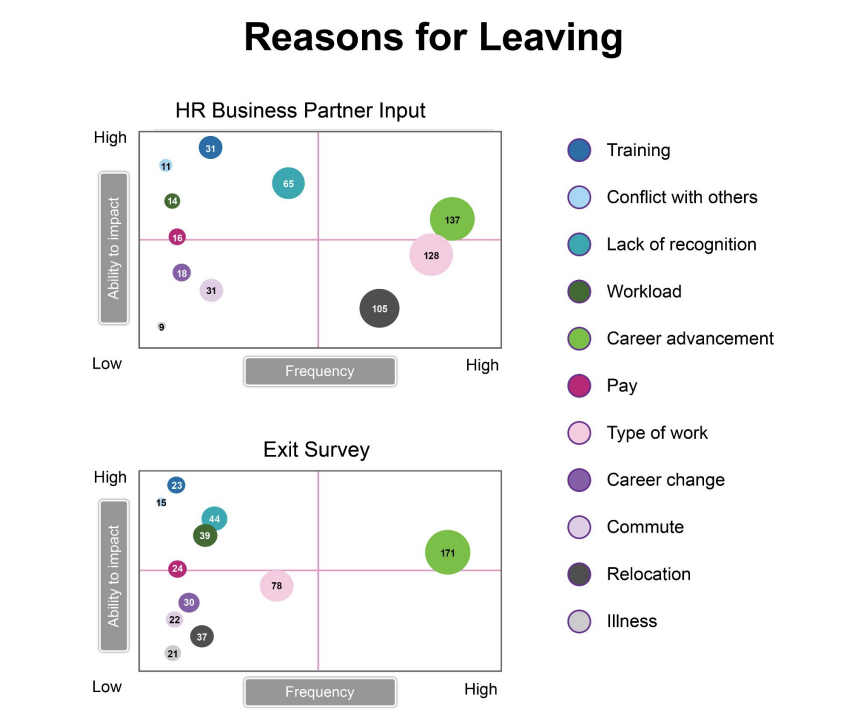




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1cfU-6vujGKchHm0lNjwj34DK7oPnImQl/edit?usp=sharing&ouid=105662445261420576158&rtpof=true&sd=true"

In [ ]:
linhas_a_ler = range(1, 13)

# Leia o arquivo CSV incluindo apenas as linhas desejadas
data_types = {"Ability to impact": int, "HRBP": int, "Exit survey" : int}
df = pd.read_csv(url, skiprows=lambda x: x not in linhas_a_ler)
# Defina a primeira coluna como índice
df = df.set_index(' ')

df

,Ability to impact,HRBP,Exit survey
,,,
Training,11,31,23
Conflict with others,10,11,15
Lack of recognition,9,65,44
Workload,8,14,39
Career advancement,7,137,171
Pay,6,16,24
Type of work,5,128,78
Career change,4,18,30
Commute,3,31,22


## O que significa cada dado da nossa planilha?

* Ability to impact

Indica a pontuação atribuída à categoria em relação à habilidade de impactar a decisão de um funcionário sair da empresa. Quanto maior a pontuação, maior o impacto percebido.

* HRBP

Refere-se à pontuação atribuída pela equipe de Parceiros de Negócios de Recursos Humanos (HRBP) à categoria em relação à sua importância para o atrito. Essa pontuação pode ser interpretada como a prioridade percebida pelos profissionais de RH.

* Exit survey

Representa a pontuação média atribuída pelos funcionários a cada categoria ao responderem ao questionário de saída. Essa pontuação reflete a importância percebida por aqueles que estão deixando a empresa.


`*A interpretação dessas pontuações pode variar dependendo do contexto e das escalas específicas utilizadas para coletar os dados. Valores mais altos indicam maior impacto ou importância percebida. Durante a análise, podemos explorar como essas pontuações se relacionam entre si e como podem influenciar o atrito na organização de marketing!*`







##Análises


### Análise de satisfação:

Crie um código para informar as áreas de maior e menor satisfação, se baseando na pontuação atribuída na entrevista de eles fazem quando saem.

Considera-se que as razões que levam a evasão estão diretamente ligadas a satisfação dos colaboradores.

In [ ]:
import pandas as pd

df = df[['Exit survey']]

# Calcular a média das pontuações na coluna 'Exit survey'
df['Mean_Score_Exit'] = df.mean(axis=1)

# Encontrar as 3 áreas de maior satisfação na coluna 'Exit survey'
areas_maior_satisfacao_exit = df['Mean_Score_Exit'].nsmallest(3).index

# Encontrar as 3 áreas de menor satisfação na coluna 'Exit survey'
areas_menor_satisfacao_exit = df['Mean_Score_Exit'].nlargest(3).index

# Exibir os resultados
print(f"Três Áreas de Maior Satisfação (Exit survey): {list(areas_maior_satisfacao_exit)}")
print(f"Três Áreas de Menor Satisfação (Exit survey): {list(areas_menor_satisfacao_exit)}")


Três Áreas de Maior Satisfação (Exit survey): ['Conflict with others', 'Commute', 'Training']
Três Áreas de Menor Satisfação (Exit survey): ['Career advancement', 'Type of work', 'Lack of recognition']


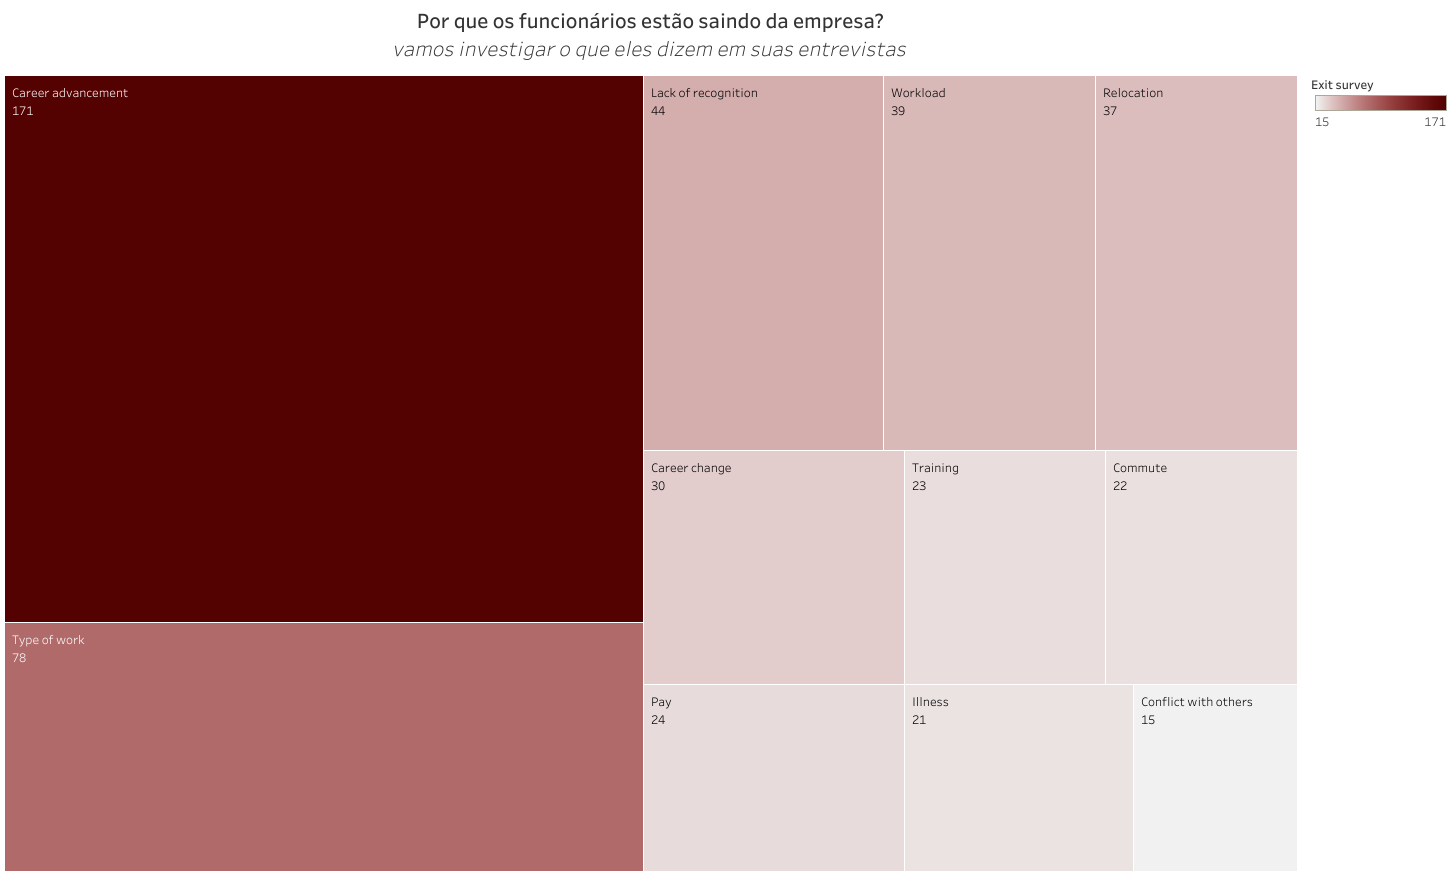

### Análise Comparativa:

Compare as pontuações de diferentes categorias para identificar padrões. Por exemplo, compare as pontuações de "Career advancement" com "Lack of recognition" para ver se há correlações.

In [ ]:
import pandas as pd

# Selecionar as linhas específicas para "Career advancement" e "Lack of recognition"
carreira = df.loc['Career advancement']
reconhecimento = df.loc['Lack of recognition']

# Calcular a correlação entre as duas séries
correlacao = carreira.corr(reconhecimento)

print(f"Correlação entre 'Career advancement' e 'Lack of recognition': {correlacao}")


Correlação entre 'Career advancement' e 'Lack of recognition': 0.8375896908320764


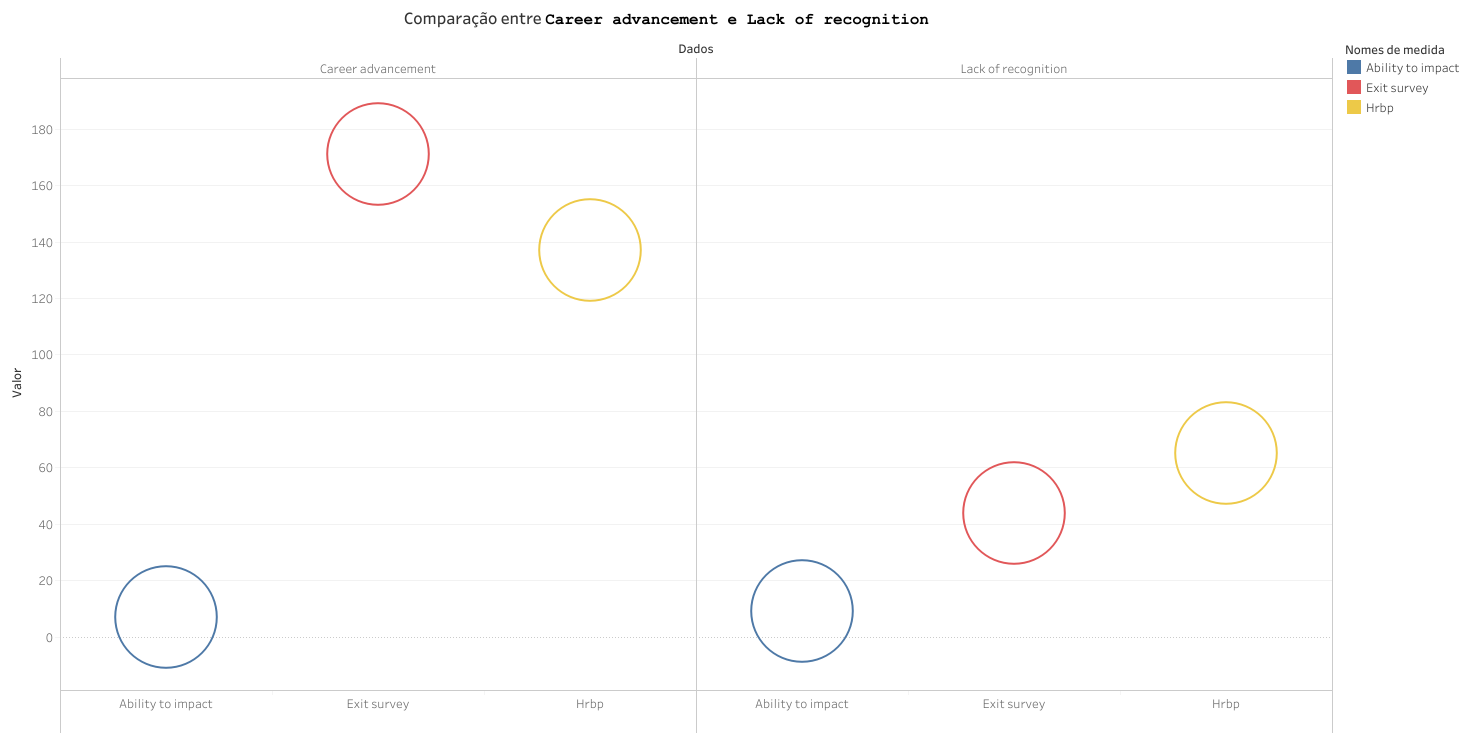

### Análise de Correlação:

Avalie a correlação entre as colunas.

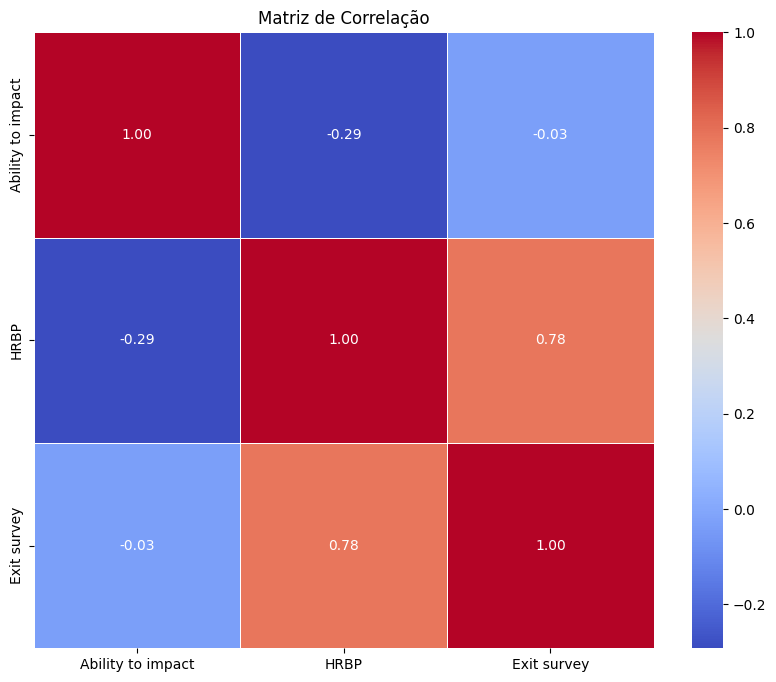

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Cria um mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


## Insights

### Estagnação na carreira e falta de reconhecimento: Quais são os motivos que mais levam os colaboradores a saírem da empresa?

A matriz de correlação entre **'Career advancement' e 'Lack of recognition'** sugere uma forte correlação positiva entre as variáveis. Isso indica que, à medida que a pontuação em 'Career advancement' aumenta, a pontuação em 'Lack of recognition' também tende a aumentar, e vice-versa, e existe uma relação forte entre essas duas variáveis.

Interdependência entre Avanço na Carreira e Reconhecimento:

Isso acontece pois os colaboradores que percebem um avanço na carreira dentro da empresa estão mais propensos a sentir-se reconhecidos, e os que não vêem sua carreira evoluido, sentem que aquilo é o máximo que podem conquistar na empresa, e que caso desejem buscar desenvolvimento, só consiguirão alcaçar seus objetivos saindo da empresa. Isso pode indicar que o reconhecimento desempenha um papel crucial na percepção de progressão profissional.

Quando observamos o fato de que os maiores índices do que leva o colaborador a sair da empresa,'Career advancement', 'Type of work', e 'Lack of recognition', então diretamente ligados um ao outro, entendemos melhor o que acontece e como resolver. A insatisfação parece estar ligada ao tipo de trabalho desempenhado, à falta de reconhecimento e à ausência de progressão na carreira dentro da organização. Essa conjunção de elementos sugere a existência de um problema nas oportunidades de crescimento e desenvolvimento profissional na empresa.

A análise aponta para a necessidade de uma investigação mais aprofundada dessas áreas críticas, visando identificar o que está impactando negativamente a satisfação colaboradores, e retê-los
Estratégias para fortalecer as oportunidades de crescimento profissional e reconhecimento podem ser fundamentais para melhorar o ambiente de trabalho e, consequentemente, reduzir as taxas de demissões. Este insight destaca a importância de focar na gestão de talentos, visando criar um ambiente propício ao desenvolvimento e realização dos colaboradores na empresa.

Algumas sugestões para a empresa auxiliar seus colaboradores a se desenvolverem e crescerem como profissionais são:



* Disponibilização de cursos, palestras e workshops em áreas relacionadas a empresa que possam ser de interesse do colaborador.

* Bolsas de estudos em faculdades para que o trabalhador possa adquirir novos conhecimentos. A possibilidade de iniciar uma graduação sem ter que se preocupar com os custos, além de mostrar ao colaborador que a empresa o valoriza, é extremamente útil, ao que terá trabalhadores mais capacitados.

* Oportunidade de ascensão e promoções que garante ao colaborador satisfação por ser reconhecido, melhoria de qualidade vida, além de ser algo extremamente benéfico para a empresa pois poupa tempo, energia e dinheiro, recursos importantes que se aplicados em outras áreas da organização podem trazer resultados ainda mais positivos.

### Diferença entre as expectativas e o que realmente acontece.
A análise cuidadosa dos dados revela uma discrepância notável entre as pontuações atribuídas ao HRBP (Business Partner de Recursos Humanos) e à capacidade de impacto (Ability to impact) em comparação com as respostas fornecidas no Exit Survey, que refletem as razões autodeclaradas para a evasão de colaboradores. Essa discrepância sugere uma desconexão perceptível entre as percepções internas e a realidade percebida pelos colaboradores.

A constatação de que as áreas de HRBP e capacidade de impacto não estão alinhadas com as respostas do Exit Survey aponta para uma necessidade urgente de ajustar o foco organizacional. Em vez de basear decisões e estratégias apenas em teorias ou preconcepções, há uma clara demanda por uma abordagem mais centrada na realidade, com uma atenção focada no que está realmente acontecendo no ambiente de trabalho, focando em ajustar as demandas que o Exit Survey demonstra.

É necessário que a organização direcione esforços para compreender e endereçar as lacunas identificadas.

* Isso pode envolver a realização de pesquisas adicionais com os colaboradores para entender o que está fazendo com que eles desejem sair da empresa antes de acontecer, condução de entrevistas com colaboradores que participaram do Exit Survey e análise mais aprofundada das dinâmicas internas.

Ao adotar uma abordagem mais orientada para a realidade, a empresa estará mais bem equipada para identificar áreas específicas de melhoria e implementar estratégias direcionadas para elevar a satisfação e o comprometimento dos colaboradores.

##Questões dos slides

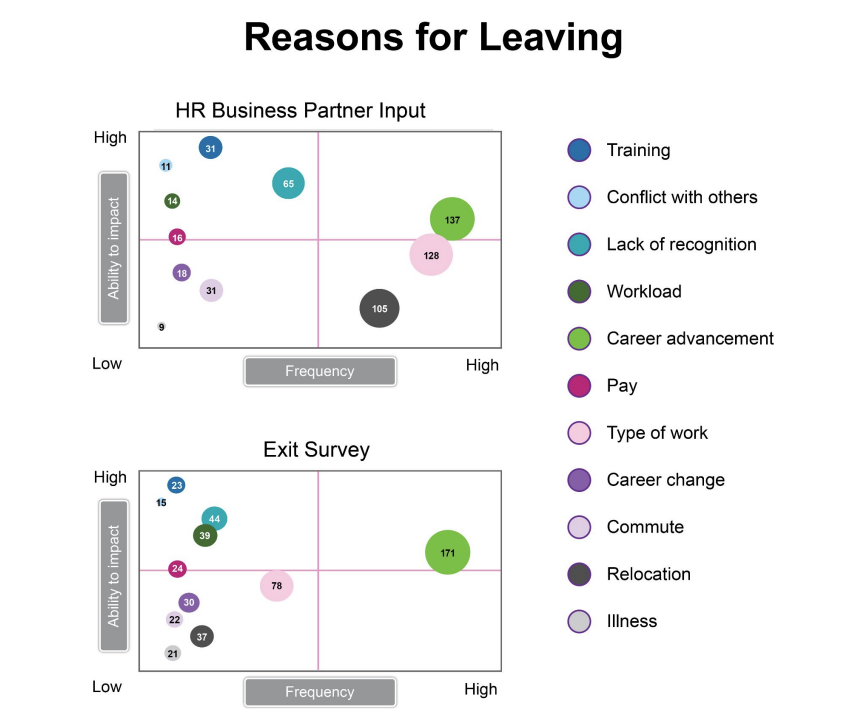

**1.  O que está sendo mostrado aqui? Escreva um texto explicando os dados.**

A seguir, é apresentado um gráfico de barras empilhadas, proporcionando uma visão abrangente dos dados. Cada tipo de pontuação é representado por uma cor distinta: o Exit survey em vermelho, o HRBP em amarelo e o Ability to impact em azul. Ao analisar o gráfico, observamos que tanto nas avaliações atribuídas pela equipe de Parceiros de Recursos Humanos quanto no Exit survey, a falta de progresso na carreira é identificada como o principal motivo para a evasão.


**2. Que observações você pode fazer a partir desses dados?**

Chama a atenção a presença destacada de "Career advancement", "Type of work", "Relocation" e "Lack of recognition", indicando áreas que demandam atenção e soluções específicas para melhorias.

Destaca-se também que, em "Workload", as pontuações atribuídas pelo Ability to impact e pelo HRBP são significativamente menores do que o indicado pela pesquisa de saída. Isso sugere uma possível desconexão entre as percepções internas e as razões reais para a saída, conforme revelado nas entrevistas de desligamento.

Em certos pontos, como "Training" e "Commute", percebe-se uma atenção considerável por parte do HRBP, embora o Exit Survey indique que esses podem ser problemas de menor impacto.

Acredito que ao concentrarmos nossos esforços nas áreas que verdadeiramente demandam atenção, seremos capazes de identificar soluções eficazes para implementar melhorias significativas. Isso reforça a importância de direcionar recursos para as questões prioritárias, promovendo um ambiente mais satisfatório para os colaboradores e, consequentemente, reduzindo a taxa de evasão.


**3. O que não é ideal ou poderia ser evitado na visualização em sua forma atual? Que
perguntas você faria ou que feedback daria para quem fez o gráfico?**

Admiro sua dedicação e agradeço por dividir seu conhecimento na apresentação dos dados. No entanto, sugiro considerar um gráfico mais claro e de fácil interpretação para otimizar a visualização das informações. Acredito que isso ajudará a destacar as nuances essenciais do conjunto de dados. Acredito que foi feito um ótimo uso dos recursos ao disponibilizar o número da pontuação e destacar essa diferença com o tamanho, mas acredito que poderia ter sido mais proveitoso e fácil de compreender se tivesse sido utilizado outro tipo de gráfico. Obrigado pela compreensão e estou à disposição para colaborarmos nesse aprimoramento.

**4. Crie três maneiras diferentes de mostrar esses dados e liste quais são algumas**

Gráfico de barras horizontais, gráfico de barras empilhadas, gráfico de barras lado a lado, exibições circulares, círculos lado a lado, gráficos de caixa, tabela de texto, etc.

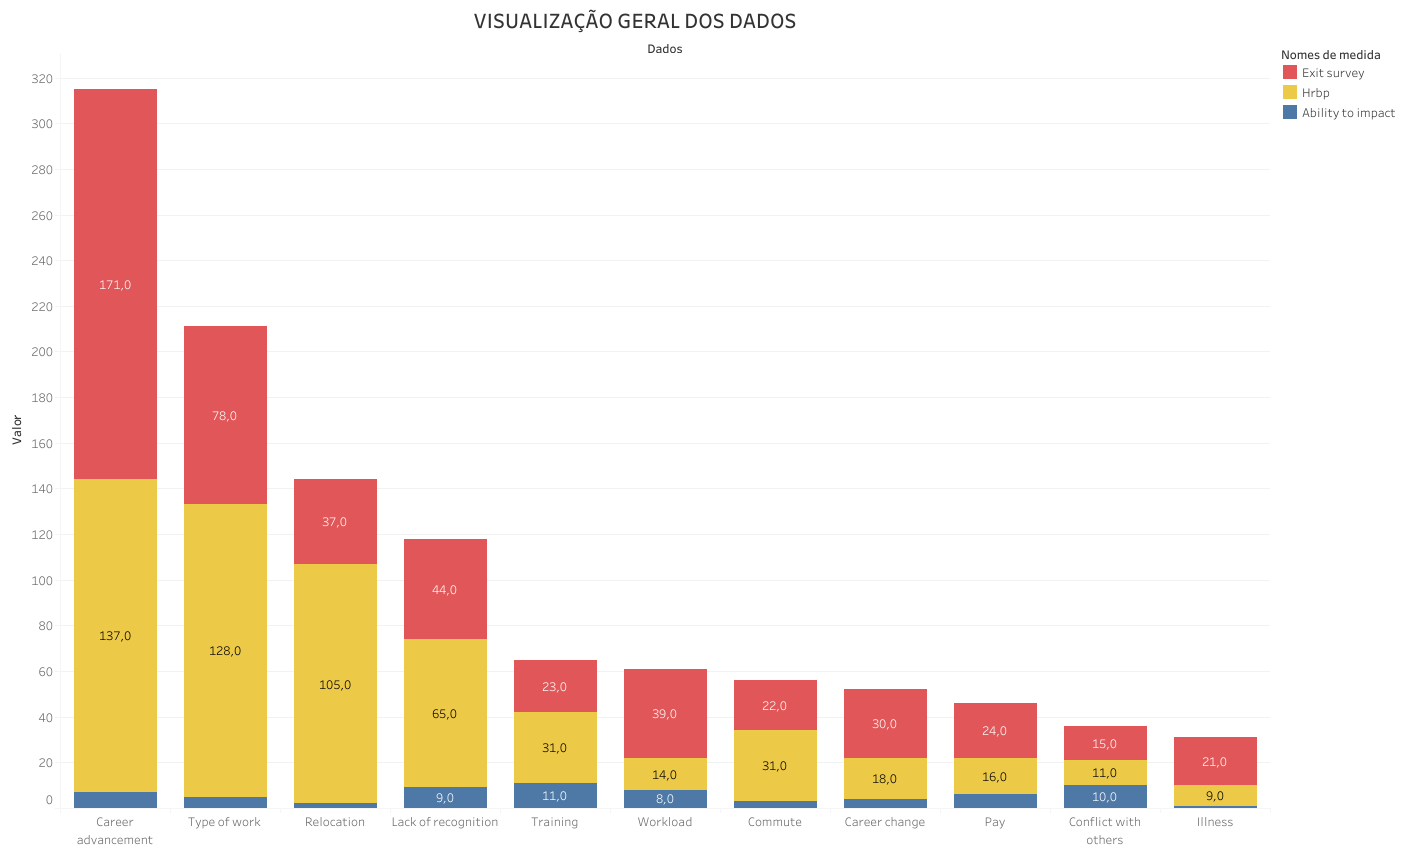

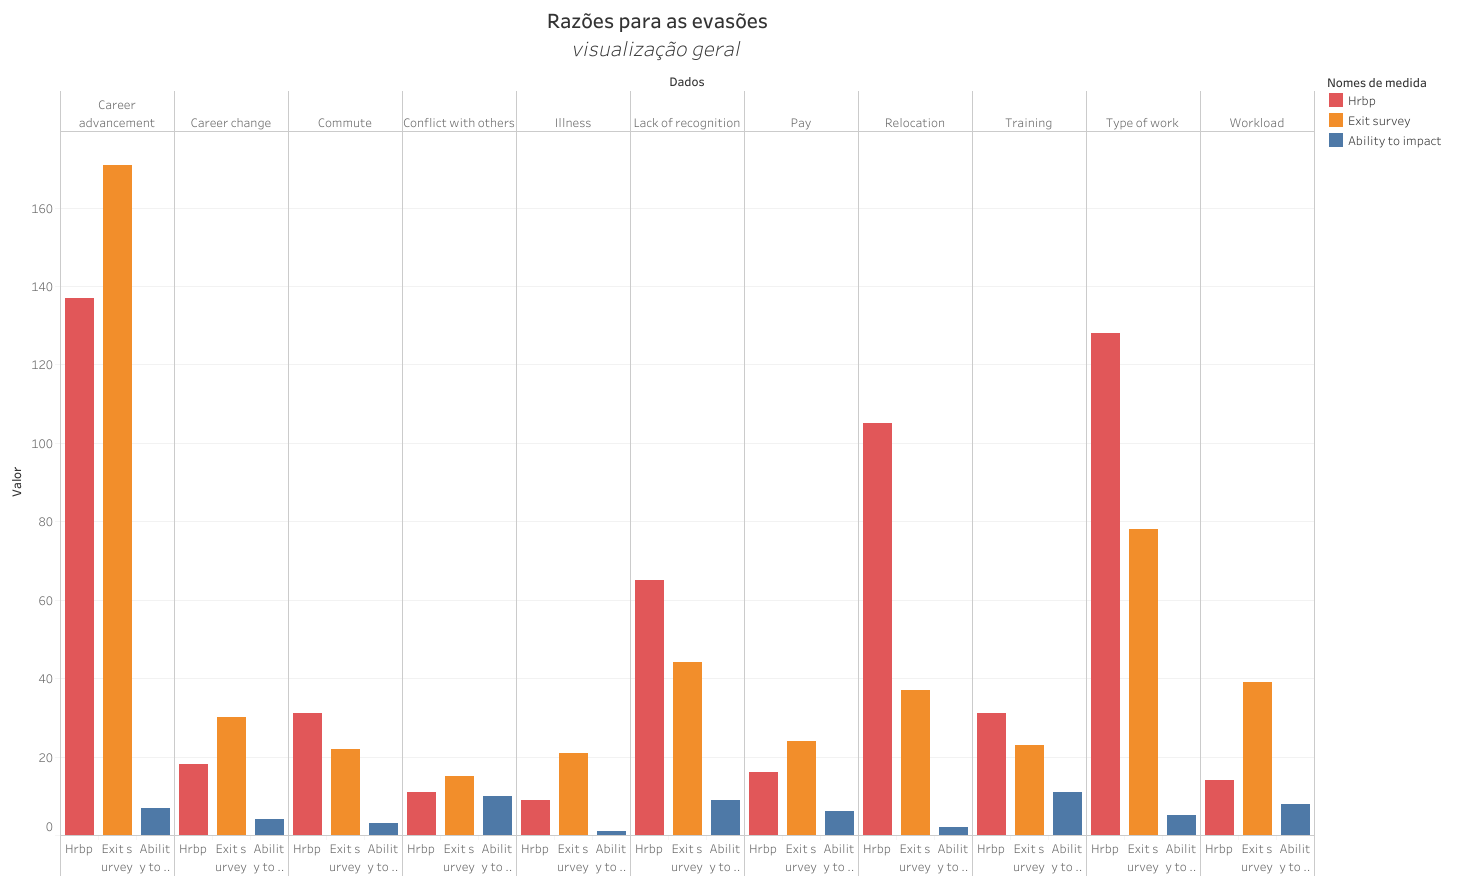

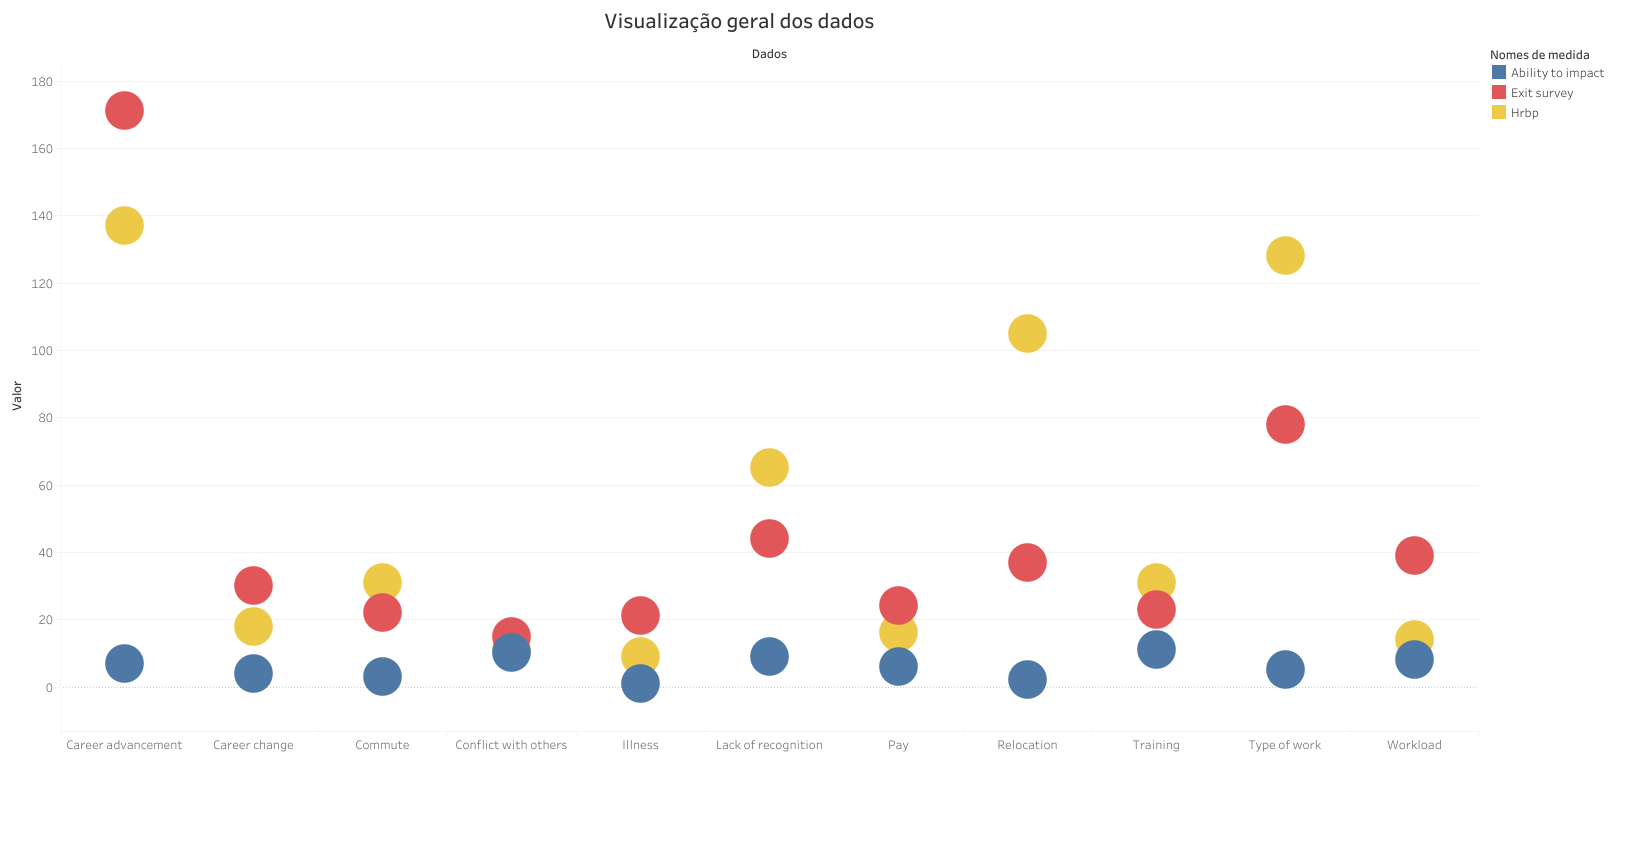

**5. Qual visualização representa melhor os dados e por quê?**

Acredito que o gráfico de barras empilhadas demonstra melhor os dados, por ser acessível, de fácil entendimento, além de não deixar os dados a margem de interpretação. É possível identificar as maiores pontuações gerais, e também é possível comparar as pontuações de cada um dos índices.

**6. Como você pode gerar essas informações em uma história orientada por dados para seu chefe?**

Gostaria de apresentar uma análise aprofundada dos dados mais recentes, destacando nuances significativas relacionadas à satisfação e retenção dos nossos colaboradores. Por meio de uma abordagem analítica, identifiquei padrões que merecem nossa atenção.

Adentrei as métricas com o intuito de compreender as variáveis essenciais, destacando "Career Advancement", "Type of Work", "Relocation" e "Lack of Recognition", que ocupam os lugares de maior pontuação em nossas planilhas. Essas variáveis emergiram como pontos importantes na compreensão da satisfação e engajamento da nossa equipe.

Ao examinar as relações, e tentar entender os dados como um todo, percebi uma forte conexão entre "Career Advancement" e "Lack of Recognition". A correlação substancial de 0.8376 indica que o avanço na carreira está estreitamente associado à percepção de reconhecimento. A insatisfação referente à falta de reconhecimento e à ausência de progressão na carreira dentro da organização se torna um dos maiores motivos pelo qual os colaboradores tomam a decisão de sair da empresa. Esses dados mostram que há a existência de um problema nas oportunidades de crescimento e desenvolvimento profissional na empresa, que deve ser solucionado, e que necessita de mais atenção.

Notavelmente, em "Workload", as pontuações atribuídas por "Ability to Impact" e "HRBP" revelam diferenças consideráveis em relação às indicações do Exit Survey. Essa discrepância demanda uma análise mais aprofundada, sugerindo a necessidade de alinhar as percepções internas com as reais razões para a evasão, conforme identificadas nas entrevistas de desligamento. Dessa maneira, é evitado o gasto de tempo e recurso em áreas que não se mostram problematicas, e é possível focar nos pontos que mais demandam atenção.

Propomos uma abordagem focada em iniciativas personalizadas para solucionar as áreas críticas identificadas. Ao direcionarmos esforços para o avanço na carreira, reconhecimento e compreensão de que há uma atenção excessiva em alguns critérios, poderemos promover melhorias substanciais na satisfação e retenção dos colaboradores.

Agradeço pela atenção e estou à disposição para discutir mais detalhes ou estratégias para implementação.


In [ ]:
df.describe()

NameError: name 'df' is not defined

## Evidência de entrega

Neste relatório, conduzi uma análise detalhada dos fatores influenciadores da decisão de evasão dos colaboradores. Utilizei a leitura direta do link da planilha, empregando a função read_csv para garantir a execução eficaz dos códigos. As análises exploratórias focaram nos motivos de evasão e em eventuais ajustes na política de retenção. Destaco a análise de satisfação, com uso da biblioteca pandas e visualização no Tableau, e a análise comparativa entre as categorias "Career Advancement" e "Lack of Recognition". A análise de correlação, incorporando pandas, seaborn e matplotlib.pyplot, revelou questões culturais e discrepâncias nas percepções da equipe de HRBP e motivos reais de evasão, me mostrando que deve haver um redirecionamento de recursos para áreas críticas, especialmente baseado no Exit Survey, visando uma abordagem mais focalizada e eficaz.

In [ ]:
user = 'Andressa Victória Fernandes Pires'
instituicao = 'SENACxResilia'
formacao = 'Formação em Análise de Dados'
mod = 'Módulo 5'
proj = 'Projeto Individual'
print(f'Relatório desenvolvido por {user} para o {proj} do {mod} do curso de {formacao} do {instituicao}')

Relatório desenvolvido por Andressa Victória Fernandes Pires para o Projeto Individual do Módulo 5 do curso de Formação em Análise de Dados do SENACxResilia


[trello com o monitoramento das atividades](https://trello.com/b/uKHgPD4h/projeto-individua)
